# Capstone Project Part 2: Feature Engineering and Modeling

**Author:** Soohyun Ahn <br>
    
**Date:** April 2023<br>
    
**Notebook Number:** 2/ 4

In the previous notebook, [**Part_1_Data_Cleaning_Preprocessing**](https://github.com/treelunar/2023_Capstone_BSTN/blob/main/Part_1_Data_Cleaning_Preprocessing.ipynb), we performed data cleaning and preprocessing on our dataset.<Br>
    
In this notebook, we will cover feature engineering, which involves transforming raw text data into a set of meaningful features that machine learning algorithms can use. Text vectorization and creating word embeddings are the key steps involved in feature engineering.

**Text vectorization** involves using techniques like Bag of Words (BoW), TF-IDF, and Word2Vec to convert text data into numerical vectors. We will be using CountVectorizer to create vector representations, followed by `k-Means` clustering and `silhouette analysis` to evaluate the quality of the clusters.
    
**Word embeddings**, on the other hand, are a type of vector representation that maps each word to a high-dimensional vector in a continuous vector space. This allows machine learning algorithms to learn the semantic relationships between words and make predictions accordingly. We will compare two word embedding models - LexVec and OpenAI's ada language model.

`LexVec` is an embedding technique that captures complex semantic relationships between words, such as analogies. It is trained on a large corpus of text, such as Wikipedia articles.

`OpenAI's ada` language model, on the other hand, is a state-of-the-art technology for natural language processing that can capture synonyms, antonyms, and other nuanced relationships between words.

Overall, through feature engineering, we will create vector representations and embeddings that will help us to better understand and analyze our text data.
    
**IMPORTANT NOTE**: again, we have a supplementary notebook that uses different dataset and go through the similar steps. [**Supplementary notebook in Supplementary**](https://github.com/treelunar/2023_Capstone_BSTN/blob/main/Supplementary/Supplementary_Part_2_Feature_Engineering_Modeling_MPST.ipynb)

## Dataset Inspection and Cleaning

In [34]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set the random seed

random.seed(42)
np.random.seed(42)

# hide warnings

import warnings
warnings.filterwarnings('ignore')

In [64]:
# Import dataset
preprocessed_df = pd.read_csv("preprocessed_no_null_40000.csv", encoding="utf-8")

In [65]:
# Peek into the dataset
preprocessed_df.head()

,imdb_id,title,original_title,overview,genres,tagline,poster_path,clean_overview
0,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...","['Animation', 'Comedy', 'Family']",NaN,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,led woodi toy live happili room birthday bring...
1,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,"['Adventure', 'Fantasy', 'Family']",Roll the dice and unleash the excitement!,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,sibl discov enchant board game open door magic...
2,tt0113228,Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...,"['Romance', 'Comedy']",Still Yelling. Still Fighting. Still Ready for...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,famili wed reignit ancient feud next door neig...
3,tt0114885,Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...","['Comedy', 'Drama', 'Romance']",Friends are the people who let you be yourself...,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,cheat mistreat step women hold breath wait elu...
4,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...,['Comedy'],Just When His World Is Back To Normal... He's ...,/e64sOI48hQXyru7naBFyssKFxVd.jpg,recov daughter wed receiv news pregnant wife e...


In [66]:
# Check the dataset
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41329 entries, 0 to 41328
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   imdb_id         41329 non-null  object
 1   title           41329 non-null  object
 2   original_title  41329 non-null  object
 3   overview        41329 non-null  object
 4   genres          41329 non-null  object
 5   tagline         19039 non-null  object
 6   poster_path     41001 non-null  object
 7   clean_overview  41329 non-null  object
dtypes: object(8)
memory usage: 2.5+ MB


There are total 41,329 unique movies in the dataset.

## Creating Text Vectors - `CountVectorizer`
By using `CountVectorizer`, we can create a bag of words representation of the synopses, compare different movies based on their similarity in terms of the frequency of certain words in their synopses. Later, we can apply `K-Means` clustering to the text vectors.

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate 
bagofwords = CountVectorizer()

# Fit 
bagofwords.fit(preprocessed_df['clean_overview'])

# Transform
transformed = bagofwords.transform(preprocessed_df['clean_overview'])
transformed

<41329x39739 sparse matrix of type '<class 'numpy.int64'>'
	with 1100622 stored elements in Compressed Sparse Row format>

In [68]:
bagofwords.get_feature_names()

['aa',
 'aaa',
 'aaaron',
 'aab',
 'aachan',
 'aachi',
 'aackerlund',
 'aadhavan',
 'aadhi',
 'aadland',
 'aak',
 'aakash',
 'aalavandhan',
 'aalst',
 'aamp',
 'aampa',
 'aampm',
 'aampr',
 'aan',
 'aanandam',
 'aang',
 'aangehouden',
 'aanmodderfakk',
 'aap',
 'aarn',
 'aaron',
 'aarp',
 'aarti',
 'aarya',
 'aasen',
 'aashish',
 'aasia',
 'aati',
 'aatish',
 'ab',
 'aba',
 'ababa',
 'abacco',
 'aback',
 'abacu',
 'abaddon',
 'abahachi',
 'aballay',
 'abalon',
 'abandon',
 'abandond',
 'abar',
 'abard',
 'abat',
 'abb',
 'abba',
 'abbaji',
 'abbaseya',
 'abbasi',
 'abbess',
 'abbey',
 'abbia',
 'abbot',
 'abbott',
 'abbystyl',
 'abc',
 'abdelkad',
 'abdic',
 'abdomin',
 'abdou',
 'abdu',
 'abduct',
 'abducte',
 'abductor',
 'abelardo',
 'aber',
 'abercrombi',
 'aberdeen',
 'aberr',
 'abet',
 'abey',
 'abgewinnen',
 'abhalten',
 'abhi',
 'abhiram',
 'abhor',
 'abhorr',
 'abid',
 'abigail',
 'abil',
 'abitur',
 'abject',
 'abkhazia',
 'abl',
 'ablaz',
 'abler',
 'abli',
 'abner',
 'abnor

The sparse matrix is too large to be converted to a dense numpy array (MemoryError occurs). Thus, we will try to save our word embeddings to a npz file. The `save_npz` function will save the sparse matrix in the compressed format in a .npz file, which can be easily loaded back later using the `load_npz` function from the same library.

In [69]:
from scipy.sparse import save_npz, load_npz
#save_npz('text_vectors.npz', transformed)

## Modeling: Silhouette Analysis and Clustering with `K-means` 

`K-means` clustering is an unsupervised machine learning algorithm used to partition a given dataset into $K$ number of clusters, where $K$ is a user-defined parameter. Although text vectors created using `CountVectorizer` are not document embeddings, they can still be used as a representation of the characteristics of each document. `K-means` clustering can identify groups of documents with similar characteristics based on the similarity of their text vectors. This can help to identify patterns and similarities between them, which is useful for tasks like recommendation systems. Determining the optimal value for `n_clusters` can be challenging, but starting with 5 or the number of existing movie genres, such as 13, which corresponds roughly to common movie genres, can be a good starting point. 

`t-SNE` is a powerful nonlinear dimensionality reduction technique that can convert high-dimensional data into lower-dimensional representations for effective data visualization. Using the TSNE `n_components=2` function, we can convert text vectors into a 2D space that can be easily plotted and analyzed. To determine the ideal $K$ number in `K-means`, the `silhouette_score` metric is commonly used. It measures the similarity of the points to their assigned clusters relative to the other clusters they are not assigned to. High Silhouette Scores and clear separation between clusters indicate the best clustering. 

To visualize the clustering results, we will display the silhouette plot and the scatter plot side by side for each number of clusters, making it easier to compare visually.

In [ ]:
#pip install --upgrade threadpoolctl

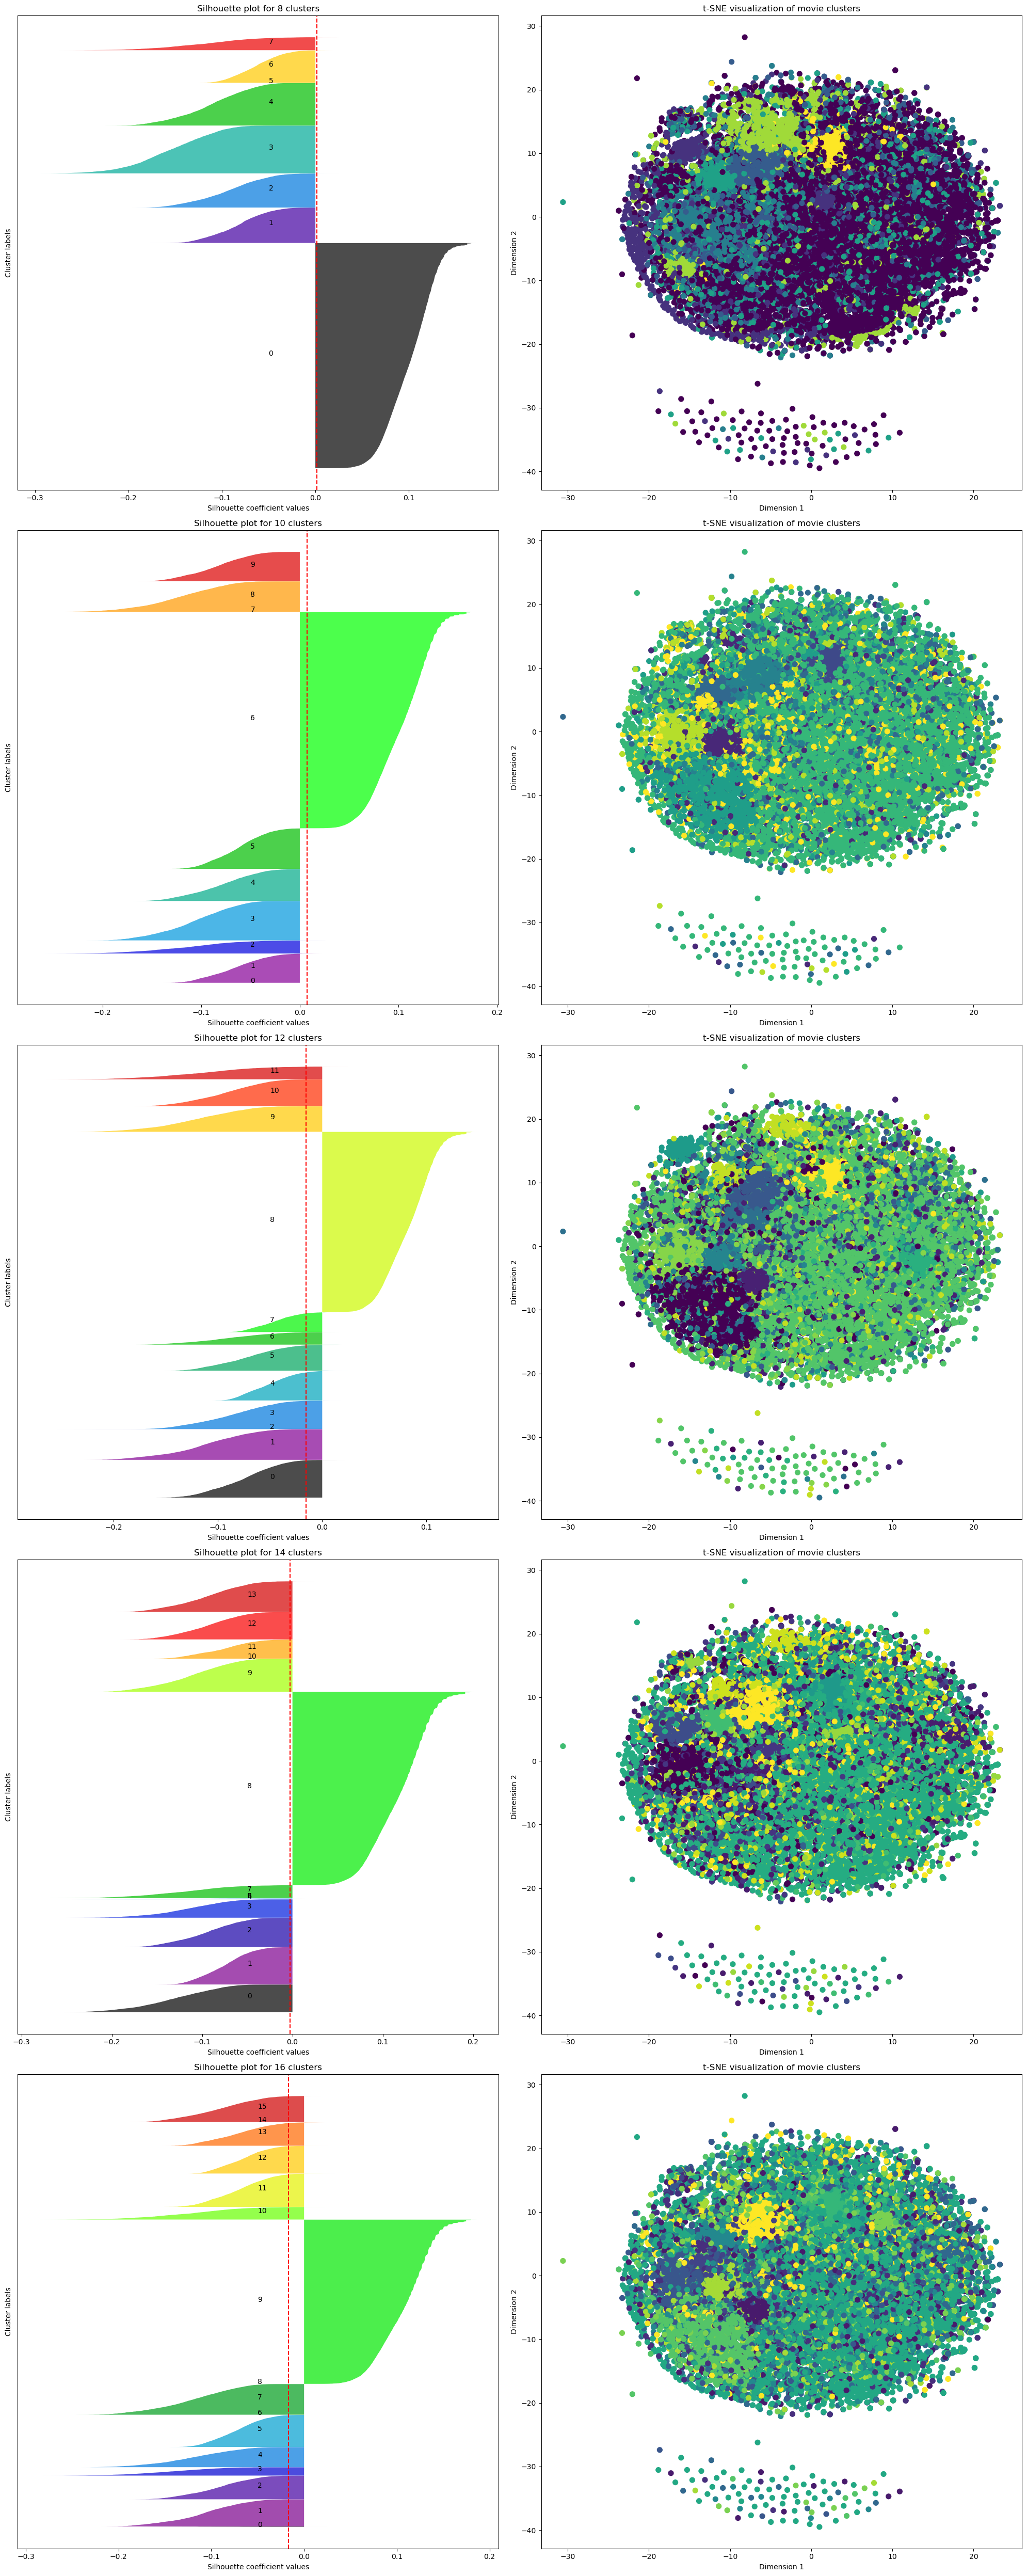

In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.manifold import TSNE

range_n_clusters = [8, 10, 12, 14, 16]
fig, axs = plt.subplots(len(range_n_clusters), 2, figsize=(20, 10*len(range_n_clusters)))

for i, n_clusters in enumerate(range_n_clusters):
    
    # Initialize the KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(transformed)

    # Calculate the silhouette score for the clustering
    silhouette_avg = silhouette_score(transformed, cluster_labels)

    # Calculate the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(transformed, cluster_labels)

    y_lower = 10
    for j in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        ith_cluster_silhouette_values.sort()

        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / n_clusters)
        axs[i, 0].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axs[i, 0].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    axs[i, 0].set_title("Silhouette plot for {} clusters".format(n_clusters))
    axs[i, 0].set_xlabel("Silhouette coefficient values")
    axs[i, 0].set_ylabel("Cluster labels")
    axs[i, 0].axvline(x=silhouette_avg, color="red", linestyle="--")
    axs[i, 0].set_yticks([])

    # Visualize the clusters with t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(transformed)
    cmap = plt.cm.get_cmap('viridis', n_clusters)
    axs[i, 1].scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap=cmap, s=50)
    axs[i, 1].set_title('t-SNE visualization of movie clusters')
    axs[i, 1].set_xlabel('Dimension 1')
    axs[i, 1].set_ylabel('Dimension 2')
    
plt.tight_layout()
plt.show()

In silhouette analysis, it is desirable to have high average silhouette widths since they indicate a well-defined clustering. A coefficient close to 1 indicates that the data point is well matched to its cluster. Unfortunately, our silhouette plots are not helpful in both aspects.

K-means clusterings are also disappointing, showing too many overlapped clusters.

Let's draw scree plots for both `K-means` and `silhouette_score`. The number of clusters that should be chosen is the "elbow" point in the scree plot, where adding another cluster does not result in a significant reduction in the the total within-cluster sum of squares (WCSS).

The inertia is a measure of how far the points within a cluster are from the centroid of that cluster.

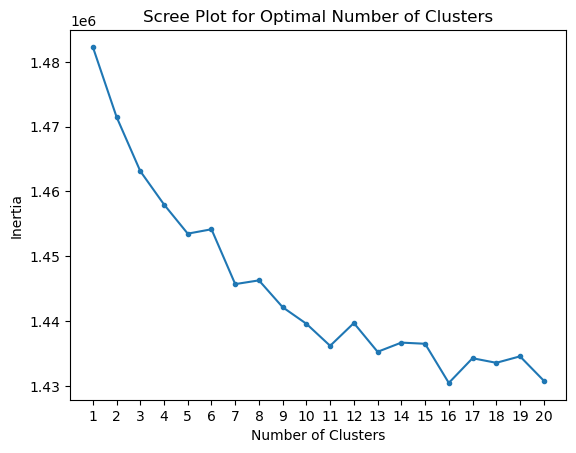

In [20]:
# Calculate the sum of squared distances (inertia) for different numbers of clusters

inertia_list = []
num_clusters = range(1, 21)

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed)
    inertia_list.append(kmeans.inertia_)

# Draw the elbow plot (sum of squared distances vs. number of clusters)

plt.figure()
plt.plot(num_clusters, inertia_list, marker=".")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot for Optimal Number of Clusters')
plt.xticks(num_clusters)
plt.show()

In general, the elbow of the plot (where the rate of decrease in inertia starts to level off) indicates a good number of clusters to use for the data. The plot does not help us select the an appropriate number of clusters.

We can move on to silhouette analysis using a scree plot. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. The higher the silhouette score, the better the clustering. The list of silhouette scores for each value of $K$ can be plotted to visualize the optimal value of $K$ that maximizes the silhouette score.

In [22]:
# A range of K values
k_range = np.arange(2, 20)

# Instantiate an empty list of silhouette scores
silhouette_scores = []

# Iterate over ks
for k in k_range:
    
    # Instantiate
    k_means_model = KMeans(n_clusters=k)

    # Fit
    k_means_model.fit(transformed)
    
    # Get cluster labels and calculate silhouette score
    cluster_labels = k_means_model.predict(transformed)
    silhouette = silhouette_score(transformed, cluster_labels)
    
    # Append to list
    silhouette_scores.append(silhouette)

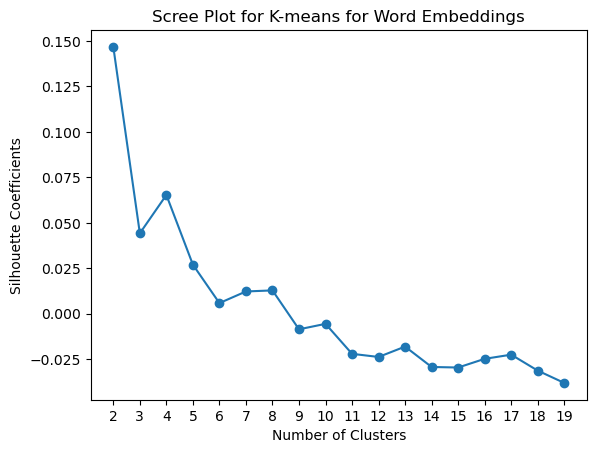

In [23]:
# Plot the silhouette 

plt.figure()
plt.plot(k_range, silhouette_scores, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficients')
plt.title('Scree Plot for K-means for Word Embeddings')
plt.xticks(k_range)
plt.show()

The above plot shows the silhouette coefficients for a range of $K$ values in `K-means` clustering for word embeddings. Again, it is very difficult to identify the optimal value of $K$ that maximizes the silhouette score.

Since both silhouette analysis and Kmeans clustering show that the quality of clustering is very low, then we can tentatively conclude that the dataset does not have clear clusters based on the features used in the analysis. We can explore other options, such as creating document embeddings.

## Document Embeddings 

Document embeddings provide a powerful way of representing the meaning of an entire document as a single vector, by combining the individual word embeddings. Typically, the word embeddings are averaged, or weighted by their importance, to obtain the document embedding. In our case, we will use two models, `LexVec` and `OpenAI`, to create two different document embeddings.

The use of document embeddings has several advantages over the traditional bag-of-words representation, as it can capture more semantic information about the documents, leading to better clustering results. Both `LexVec` and `OpenAI` are state-of-the-art techniques for creating document embeddings, and have demonstrated their efficacy in various natural language processing tasks. By utilizing these techniques to create document embeddings, we can potentially capture more meaningful and relevant information about the movie synopses, which can provide deeper insights into the similarities and differences between the movies.

## `LexVec`

The `LexVec` is a modification of the `word2vec` model and was designed to capture semantic relationships between words. We will use the 300-dimensional version, which was trained on the entire English Wikipedia.

In [117]:
#nltk.download('punkt')
import nltk
import gensim
from gensim.utils import simple_preprocess
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from scipy.spatial.distance import cosine as cosine_distance

In [74]:
model = gensim.models.KeyedVectors.load_word2vec_format(
    'lexvec-wikipedia-word-vectors', binary=False
)

In [75]:
def document2vec(text):
    """
    Embed a document by averaging the word vectors of the tokenized text. Out-of-vocabulary words are replaced by the zero-vector.
    -----
    
    Input: text (string)
    Output: embedding vector (np.array)
    """
    # Preprocess text
    cleaned_text = simple_preprocess(text, deacc=True) # Removes accents (e.g. converting "é" to "e")
    
    # Filter tokens
    stop_words = set(stopwords.words('english'))
    filtered_tokenized = [word for word in cleaned_text if word not in stop_words and word.isalpha()]

    # Embed words
    word_embeddings = []
    for word in filtered_tokenized:
        
        # if the word is in the model then embed
        if word in model:
            vector = model[word]
        # add zeros for out-of-vocab words
        else:
            vector = np.zeros(300)
            
        word_embeddings.append(vector)
    
    # Average word vectors
    if word_embeddings:
        sentence_embedding = np.stack(word_embeddings).mean(axis=0)
    else:
        sentence_embedding = np.zeros(300)
    
    return sentence_embedding

To compare `cosine_distance` and `euclidean_distance`, we need to define `euclidean_distance`.

In [76]:
from numpy.linalg import norm

def euclidean_distance(u, v):
    """
    Calculate the Euclidean distance between two vectors.
    -----
    
    Input: u, v (np.array)
    Output: distance (float)
    """
    return np.linalg.norm(u - v)

Let's compare the first three movies we see in our dataset: `Toy Story`, `Jumanji`, and `Grumpier Old Men`.

In [77]:
emb0 = document2vec(preprocessed_df['clean_overview'][0]) # Toy Story
emb1 = document2vec(preprocessed_df['clean_overview'][1]) # Jumanji
emb2 = document2vec(preprocessed_df['clean_overview'][2]) # Grumpier Old Men

In [78]:
# Compute both distances together

cosine_dist = cosine_distance(emb0, emb1) # Toy Story vs Jumanji
euclidean_dist = euclidean_distance(emb0, emb1) # Toy Story vs Jumanji

print(f"Cosine distance between {preprocessed_df['title'][0]} and {preprocessed_df['title'][1]} is {cosine_dist:.3f}")
print(f"Euclidean distance between {preprocessed_df['title'][0]} and {preprocessed_df['title'][1]} is {euclidean_dist:.3f}")

Cosine distance between Toy Story and Jumanji is 0.523
Euclidean distance between Toy Story and Jumanji is 0.921


In [79]:
cosine_dist = cosine_distance(emb0, emb2) # Toy Story vs Grumpier Old Men
euclidean_dist = euclidean_distance(emb0, emb2) # Toy Story vs Grumpier Old Men

print(f"Cosine distance between {preprocessed_df['title'][0]} and {preprocessed_df['title'][2]} is {cosine_dist:.3f}")
print(f"Euclidean distance between {preprocessed_df['title'][0]} and {preprocessed_df['title'][2]} is {euclidean_dist:.3f}")

Cosine distance between Toy Story and Grumpier Old Men is 0.673
Euclidean distance between Toy Story and Grumpier Old Men is 1.057


In [80]:
cosine_dist = cosine_distance(emb1, emb2) # Jumanji vs Grumpier Old Men
euclidean_dist = euclidean_distance(emb1, emb2) # Jumanji vs Grumpier Old Men

print(f"Cosine distance between {preprocessed_df['title'][1]} and {preprocessed_df['title'][2]} is {cosine_dist:.3f}")
print(f"Euclidean distance between {preprocessed_df['title'][1]} and {preprocessed_df['title'][2]} is {euclidean_dist:.3f}")

Cosine distance between Jumanji and Grumpier Old Men is 0.491
Euclidean distance between Jumanji and Grumpier Old Men is 0.755


We utilized `LexVec` to generate document embeddings for three movies: **Toy Story**, **Jumanji**, and **Grumpier Old Men**.<br>We then computed the cosine distance and Euclidean distance between each pair of movies. While these results are limited in scope, we can visualize them by drawing a triangle for each distance metric, with each point representing a movie and the length of each side reflecting the distance between the corresponding movies.

- Both distances suggest that **Jumanji** and **Grumpier Old Men** are closest to one another than the other movies.
- Both distnaces suggest that **Toy Story** and **Grumpier Old Men** are least similar.

Let's create three additional document embeddings using `LexVec` and compare the cosine distance and euclidean distance between them. This time, we will intentionally choose two movies that are more similar to each other than the remaining one.

Our selection includes **Mortal Kombat** and **Scarface**, which are quite dissimilar since one is a fantasy and adventure movie while the other is more crime-oriented. However, they share similarities such as having lots of action scenes and being quite violent. The third movie, **Up**, is entirely different from the other two. **Up** is an animated, family-oriented adventure that can be enjoyed by all ages. It tells a beautiful story that is heartwarming to watch.

By comparing these three movies using the two types of distances, we can gain insights into their similarities and differences.

In [70]:
# Find out the index number of `Mortal Kombat` 
preprocessed_df[preprocessed_df['title'] == "Mortal Kombat"]

,imdb_id,title,original_title,overview,genres,tagline,poster_path,clean_overview
42,tt0113855,Mortal Kombat,Mortal Kombat,For nine generations an evil sorcerer has been...,"['Action', 'Fantasy']",Nothing In This World Has Prepared You For This.,/bdXWixjWVA7Y03PvW74xufrROiJ.jpg,nine gener evil sorcer victori hand hand battl...


In [71]:
# Find out the index number of `Up`
preprocessed_df[preprocessed_df['title'] == "Up"]

,imdb_id,title,original_title,overview,genres,tagline,poster_path,clean_overview
13193,tt1049413,Up,Up,Carl Fredricksen spent his entire life dreamin...,"['Animation', 'Comedy', 'Family', 'Adventure']",NaN,/nk11pvocdb5zbFhX5oq5YiLPYMo.jpg,spent entir life dream explor globe experienc ...


In [72]:
# Find out the index number of `Scarface`
preprocessed_df[preprocessed_df['title'] == "Scarface"]

,imdb_id,title,original_title,overview,genres,tagline,poster_path,clean_overview
4073,tt0086250,Scarface,Scarface,After getting a green card in exchange for ass...,"['Action', 'Crime', 'Drama', 'Thriller']",The world is yours...,/zr2p353wrd6j3wjLgDT4TcaestB.jpg,get green card exchang assassin cuban govern o...


In [81]:
# Generate embeddings for each movie

emb42 = document2vec(preprocessed_df['clean_overview'][42]) # Mortal Kombat
emb13193 = document2vec(preprocessed_df['clean_overview'][13193]) # Up
emb4073 = document2vec(preprocessed_df['clean_overview'][4073]) # Scarface

This time, instead of showing calculated numbers, we will create a scatter plot to compare two distance metrics.

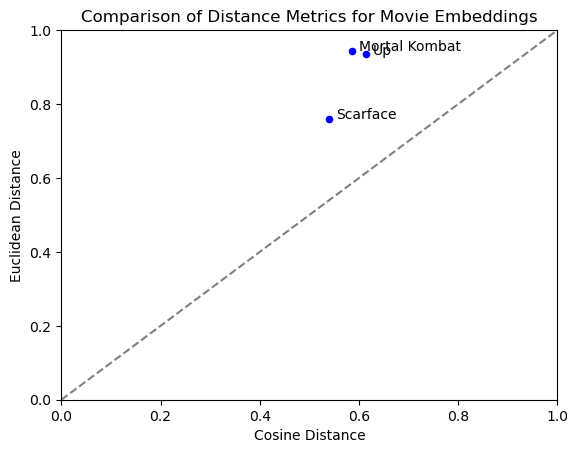

In [165]:
# Calculate cosine distance
cosine_dist_mortal_kombat_up = cosine_distance(emb42, emb13193)
cosine_dist_mortal_kombat_scarface = cosine_distance(emb42, emb4073)
cosine_dist_up_scarface = cosine_distance(emb13193, emb4073)

# Calculate Euclidean distance
euclidean_dist_mortal_kombat_up = euclidean_distance(emb42, emb13193)
euclidean_dist_mortal_kombat_scarface = euclidean_distance(emb42, emb4073)
euclidean_dist_up_scarface = euclidean_distance(emb13193, emb4073)

# Create a list of distances for both metrics
cosine_dists = [cosine_dist_mortal_kombat_up, cosine_dist_mortal_kombat_scarface, cosine_dist_up_scarface]
euclidean_dists = [euclidean_dist_mortal_kombat_up, euclidean_dist_mortal_kombat_scarface, euclidean_dist_up_scarface]

# Set up the plot
fig, ax = plt.subplots()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xlabel('Cosine Distance')
ax.set_ylabel('Euclidean Distance')
ax.set_title('Comparison of Distance Metrics for Movie Embeddings')

# Plot the distances
ax.scatter(cosine_dists, euclidean_dists, s=20, c='blue')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')  # diagonal line for reference

# Add movie names as labels
movies = ['Mortal Kombat', 'Scarface', 'Up']
for i, movie in enumerate(movies):
    ax.annotate(movie, (cosine_dists[i], euclidean_dists[i]), xytext=(5, 0), textcoords='offset points')

plt.show()

The diagonal line represents the case where the two distance metrics are equal.
- Points above the diagonal line have a higher Euclidean distance than cosine distance, indicating that the distance between the two movies is larger in the Euclidean space than in the cosine space.
- Points below the diagonal line have a higher cosine distance than Euclidean distance, indicating that the distance between the two movies is larger in the cosine space than in the Euclidean space.

The smaller the perpendicular distance, the closer the point is to the diagonal line, indicating a stronger agreement between the two distance metrics.

The plot shows that the pairwise distances between the three movies are generally higher in the Euclidean space than in the cosine space. Although it is difficult to draw any definitive conclusions from this limited analysis, the given  plot suggests that cosine distance may be a better distance metric for clustering these movies based on their synopses. Moreover, as cosine similarity is more commonly used and is recommended for OpenAI language models, we will proceed with using cosine distance in our subsequent analyses. 

## OpenAI Embeddings: `text-embedding-ada-002`

[OpenAI](https://platform.openai.com/docs/guides/embeddings/use-cases) provides a range of language models with varying levels of complexity and accuracy. To create a document embedding, we can use one of the OpenAI's embedding models to obtain the word embeddings for each token in the sequence. Once we have the word embeddings, we can aggregate them into a single document embedding using a method, such as averaging or concatenation.

We will use the `text-embedding-ada-002` model, which is known to be "better, cheaper, and simpler to use" than other existing models.

According to [OpenAI](https://platform.openai.com/docs/guides/embeddings/what-are-embeddings) documentation for word embeddings, the ada v2 embedding model can take up to 8,191 tokens. as maximum input token. So, we need to check whether the tokens from any of the plot exceeds the maximum number.

In [83]:
# Check the number of rows with missing values

num_missing = preprocessed_df['clean_overview'].isna().sum()
print(f"Number of rows with missing values: {num_missing}")

Number of rows with missing values: 0


In [84]:
# Create a new column that contains the number of tokens in the `clean_plot`
preprocessed_df['num_tokens'] = preprocessed_df['clean_overview'].apply(lambda x: len(x.split()))

# Find out the maximum and minimum number of tokensb
max_tokens = preprocessed_df['num_tokens'].max()
min_tokens = preprocessed_df['num_tokens'].min()
print(f"Maximum number of tokens: {max_tokens}")
print(f"Minimum number of tokens: {min_tokens}")

Maximum number of tokens: 119
Minimum number of tokens: 1


There are no missing values but some synopses appear to have 0 tokens. It is possible that some documents may have been completely empty or had only stopwords, resulting in a token count of 0. If the minimum number of tokens is 0, it can potentially cause a problem when creating document embeddings using methods that involve dividing by the number of tokens, such as averaging the word embeddings. Dividing by 0 is undefined and can result in errors.

In [85]:
# Count the number of movies with 0 tokens

num_zero_tokens = sum(preprocessed_df['num_tokens'] == 0)
print("Number of movies with 0 tokens:", num_zero_tokens)

Number of movies with 0 tokens: 0


In [86]:
# Count the total number of tokens 
preprocessed_df['num_tokens'].sum()

1192083

Here, we can drop rows that have 0 tokens. However, it means we are removing all information about those movies from the dataset. This might not be desirable if other columns in the dataset are relevant and useful for analysis. Thus, we will filter out the rows with 0 tokens using a boolean mask. This way, we can preserve other information about the movies in the dataset while still ensuring that we have valid data to work with when creating document embeddings.

In [87]:
# Keep only rows where the 'num_tokens' column is  not 0
preprocessed_df = preprocessed_df[preprocessed_df['num_tokens'] != 0]

In [102]:
# Sanity check
preprocessed_df.head(3)

,imdb_id,title,original_title,overview,genres,tagline,poster_path,clean_overview,num_tokens
0,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...","['Animation', 'Comedy', 'Family']",NaN,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,led woodi toy live happili room birthday bring...,26
1,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,"['Adventure', 'Fantasy', 'Family']",Roll the dice and unleash the excitement!,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,sibl discov enchant board game open door magic...,33
2,tt0113228,Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...,"['Romance', 'Comedy']",Still Yelling. Still Fighting. Still Ready for...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,famili wed reignit ancient feud next door neig...,31


### Connecting to the API

In this section we will set our API key and send a request to verify that we can send a request.<br>To do so, you need to get yourself a private API key first by signing up to create your account. Check [here](https://beta.openai.com/signup).

In [56]:
import tiktoken # need to pip install  
import openai # need to pip install

# copy and paste your personal api key inbetween the quotation marks and then execute the below code
openai.api_key = "..."

In [57]:
# list models as a quick test
models = openai.Model.list()

# print the first model's id
print(models.data[0].id)

babbage


In [58]:
# Test if we can send a request

completion = openai.Completion.create(model="ada", prompt="Hello world")
print(completion['choices'][0].text)

 and I had absolutely no problem with emulating specific cldr files, or other


In [59]:
# Import `get_embedding`
from openai.embeddings_utils import get_embedding

In [60]:
# Embedding model parameters

embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # This is the encoding for text-embedding-ada-002
max_tokens = 8000

According to the [OpenAI documentations](https://platform.openai.com/docs/guides/rate-limits/error-mitigation), it's recommended to implement one of the libraries like Tenacity or Backoff to handle retries and manage rate limits more efficiently. This will help prevent overloading the API and will also ensure that your code can handle transient errors or rate limits more gracefully. 

In [61]:
from tenacity import retry, stop_after_attempt, wait_exponential

# Define the retry strategy using Tenacity
@retry(stop=stop_after_attempt(5), wait=wait_exponential(multiplier=1, min=4, max=30))

def get_embedding(text, engine="text-embedding-ada-002"):
    text = text.replace("\n", " ")
    response = openai.Embedding.create(input=[text], model=engine)
    embeddings = response['data'][0]['embedding']
    return embeddings

# Apply the get_embedding function with retries
# Getting the embeddings took approximately 2.5 hours with a paid account (with a free account, it took 13 hours)
# Do not run the below code unless you want to get the embeddings for yourself
#preprocessed_df['ada_embeddings'] = preprocessed_df.clean_overview.apply(lambda x: get_embedding(x, engine=embedding_model))
#preprocessed_df.to_csv('ada_embeddings_movie_40000.csv', index=False)

## Inspect Embeddings

Now that we have word embeddings saved as a csv file, we will read in the file and use it from now on.

In [114]:
# Read in the csv file
# OpenAI instruction says we use `apply(eval).apply(np.array)`

ada_40000_df = pd.read_csv('ada_embeddings_movie_40000.csv')
ada_40000_df['ada_embeddings'] = ada_40000_df.ada_embeddings.apply(eval).apply(np.array)
ada_40000_df.head()

,imdb_id,title,original_title,overview,clean_overview,genres,tagline,poster_path,num_tokens,ada_embeddings
0,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",led woodi toy live happili room birthday bring...,"['Animation', 'Comedy', 'Family']",NaN,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,26,"[-0.01801527477800846, -0.02206587977707386, 0..."
1,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,sibl discov enchant board game open door magic...,"['Adventure', 'Fantasy', 'Family']",Roll the dice and unleash the excitement!,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,33,"[-0.005219690967351198, -0.019913190975785255,..."
2,tt0113228,Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...,famili wed reignit ancient feud next door neig...,"['Romance', 'Comedy']",Still Yelling. Still Fighting. Still Ready for...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,31,"[0.006672864779829979, -0.010083439759910107, ..."
3,tt0114885,Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",cheat mistreat step women hold breath wait elu...,"['Comedy', 'Drama', 'Romance']",Friends are the people who let you be yourself...,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,24,"[-0.016164006665349007, -0.0014150608330965042..."
4,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...,recov daughter wed receiv news pregnant wife e...,['Comedy'],Just When His World Is Back To Normal... He's ...,/e64sOI48hQXyru7naBFyssKFxVd.jpg,17,"[-0.012427903711795807, 0.0046121967025101185,..."


In [197]:
import ast

ada_40000_df = pd.read_csv('ada_embeddings_movie_40000.csv')
ada_40000_df['ada_embeddings'] = ada_40000_df.ada_embeddings.apply(ast.literal_eval).apply(np.array)
ada_40000_df.head()


,imdb_id,title,original_title,overview,clean_overview,genres,tagline,poster_path,num_tokens,ada_embeddings
0,tt0114709,Toy Story,Toy Story,"Led by Woody, Andy's toys live happily in his ...",led woodi toy live happili room birthday bring...,"['Animation', 'Comedy', 'Family']",NaN,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,26,"[-0.01801527477800846, -0.02206587977707386, 0..."
1,tt0113497,Jumanji,Jumanji,When siblings Judy and Peter discover an encha...,sibl discov enchant board game open door magic...,"['Adventure', 'Fantasy', 'Family']",Roll the dice and unleash the excitement!,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,33,"[-0.005219690967351198, -0.019913190975785255,..."
2,tt0113228,Grumpier Old Men,Grumpier Old Men,A family wedding reignites the ancient feud be...,famili wed reignit ancient feud next door neig...,"['Romance', 'Comedy']",Still Yelling. Still Fighting. Still Ready for...,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,31,"[0.006672864779829979, -0.010083439759910107, ..."
3,tt0114885,Waiting to Exhale,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",cheat mistreat step women hold breath wait elu...,"['Comedy', 'Drama', 'Romance']",Friends are the people who let you be yourself...,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,24,"[-0.016164006665349007, -0.0014150608330965042..."
4,tt0113041,Father of the Bride Part II,Father of the Bride Part II,Just when George Banks has recovered from his ...,recov daughter wed receiv news pregnant wife e...,['Comedy'],Just When His World Is Back To Normal... He's ...,/e64sOI48hQXyru7naBFyssKFxVd.jpg,17,"[-0.012427903711795807, 0.0046121967025101185,..."


In [198]:
ada_40000_df.to_csv('ada_40000_streamlit.csv', index=False)

In [187]:
pd.set_option('display.max_colwidth', None)
ada_40000_df.iloc[0]['ada_embeddings']

array([-0.01801527, -0.02206588,  0.00885184, ...,  0.00711688,
       -0.00248914, -0.02343968])

In [188]:
ada_df.iloc[0]['ada_embeddings']

'[-0.01801527 -0.02206588  0.00885184 ...  0.00711688 -0.00248914\n -0.02343968]'

In [191]:
print(ada_40000_df.loc[0, 'ada_embeddings'])


[-0.01801527 -0.02206588  0.00885184 ...  0.00711688 -0.00248914
 -0.02343968]


## Experiment with the Embeddings

Let's expriment with the embeddings to see how our model functions well. Again, we will use the `consine_distance` function to get the most similar movies as well as the least similar movies.

In [119]:
# Import package
from scipy.spatial.distance import cosine

In [121]:
# sample plot ("Jumanji")

sample_plot = ada_40000_df[['clean_overview','ada_embeddings']].iloc[1,:] # Row with index=1
print(sample_plot['clean_overview'])

sibl discov enchant board game open door magic world unwittingli invit adult trap insid game year live room hope freedom finish game prove riski three find run giant rhinoceros evil monkey terrifi creatur


In [126]:
import ast

max_distance = 0
row_index = 0

# Convert the string representation of the sample_plot embeddings to an actual NumPy array
sample_plot_embeddings = sample_plot['ada_embeddings']

# Iterate through each row and compute the cosine distance between the sample_plot and all other plots
while row_index < ada_40000_df.shape[0]:  
    
    # Convert the string representation of the array to an actual NumPy array
    cur_embeddings = ada_40000_df['ada_embeddings'].iloc[row_index]
    
    # Compute the cosine distance between the sample plot and the current plot
    cur_distance = cosine(sample_plot_embeddings, cur_embeddings)

    # Update max_distance and doc if cur_distance is greater than max_distance and is not 1
    if (cur_distance > max_distance) & (cur_distance != 1):  # The maximum possible cosine distance is 1 
        
        max_distance = cur_distance
        doc = ada_40000_df['clean_overview'].iloc[row_index]
    
    row_index += 1

In [127]:
# The movie plot which has the highest cosine distance from the sample plot ("Jumanji")
doc

'gangster era film last girl written'

The most dissimilar movie to **Jumanji** has 'gangster era film last girl written' in its `clean_overview` column.<br>We need to find out what this movie is.

In [129]:
# Find the row that contains the doc in the clean_overview column

movie_row = ada_40000_df[ada_40000_df['clean_overview'] == doc]

# Extract the imdb_id, title, and overview of the movie from the row

movie_imdb_id = movie_row['imdb_id'].values[0]
movie_title = movie_row['title'].values[0]
movie_overview = movie_row['overview'].values[0]

# Print the title and imdb_id of the movie

print(f"IMDb ID: {movie_imdb_id}")
print(f"Title: {movie_title}")
print(f"Overview: {movie_overview}")

IMDb ID: tt0079429
Title: The Lady in Red
Overview: 1930's gangster era film about Dillinger and his last girl. Written by John Sayles.


For the comparison, here are links for two movies: [**Jumanji**](https://www.imdb.com/title/tt0113497/?ref_=fn_al_tt_1) and [**The Lady in Red**](https://www.imdb.com/title/tt0079429/?ref_=fn_al_tt_1)<br>The output seems sensible.

Let's try another sample, **Mr.Holland's Opus**.

In [132]:
# Find out "Mr. Holland's Opus"
opus = ada_40000_df[ada_40000_df['title'] == "Mr. Holland's Opus"]
opus

,imdb_id,title,original_title,overview,clean_overview,genres,tagline,poster_path,num_tokens,ada_embeddings
60,tt0113862,Mr. Holland's Opus,Mr. Holland's Opus,"In 1965, passionate musician Glenn Holland tak...",passion musician take day job high school musi...,"['Music', 'Drama', 'Family']","Of All the Lives He Changed, the One That Chan...",/jYEKdpVvRV3KdyHMUVYyg0KTVSY.jpg,31,"[-0.00606570765376091, -0.0064636836759746075,..."


In [138]:
# sample plot ("Mr. Holland's Opus")

sample_plot1 = ada_40000_df[['clean_overview','ada_embeddings']].iloc[60,:] # Row with index=60
print(sample_plot1['clean_overview'])

passion musician take day job high school music teacher convinc small obstacl road true call write histor opu decad roll composit unwritten gener student inspir teach holland must redefin life purpos


In [144]:
max_distance = 0
row_index = 0

# Convert the string representation of the sample_plot embeddings to an actual NumPy array
sample_plot1_embeddings = sample_plot1['ada_embeddings']

# Iterate through each row and compute the cosine distance between the sample_plot and all other plots
while row_index < ada_40000_df.shape[0]:  
    
    # Convert the string representation of the array to an actual NumPy array
    cur_embeddings = ada_40000_df['ada_embeddings'].iloc[row_index]
    
    # Compute the cosine distance between the sample plot and the current plot
    cur_distance = cosine(sample_plot1_embeddings, cur_embeddings)

    # Update max_distance and doc if cur_distance is greater than max_distance and is not 1
    if (cur_distance > max_distance) & (cur_distance != 1):  # The maximum possible cosine distance is 1 
        
        max_distance = cur_distance
        doc1 = ada_40000_df['clean_overview'].iloc[row_index]
    
    row_index += 1

In [145]:
doc1

'killer bat plagu indian reserv new mexico'

In [146]:
# Find the row that contains the doc in the clean_overview column

movie_row = ada_40000_df[ada_40000_df['clean_overview'] == doc1]

# Extract the imdb_id, title, and overview of the movie from the row

movie_imdb_id = movie_row['imdb_id'].values[0]
movie_title = movie_row['title'].values[0]
movie_overview = movie_row['overview'].values[0]

# Print the title and imdb_id of the movie

print(f"IMDb ID: {movie_imdb_id}")
print(f"Title: {movie_title}")
print(f"Overview: {movie_overview}")

IMDb ID: tt0079631
Title: Nightwing
Overview: Killer bats plague an Indian reservation in New Mexico.


Our model chose [**Nightwing**](https://www.imdb.com/title/tt0079631/?ref_=fn_al_tt_2) as the least similar movie to [**Mr. Holland's Opus**](https://www.imdb.com/title/tt0113862/?ref_=fn_al_tt_1). Given that the former is a horro movie whereas the latter is a drama, our model works fine.

Now that we have tested our embeddings and functions, we can define two functions to be used in our final recommendation system. First, we need to define a function that takes a text input and returns embeddings generated by the OpenAI's ada model.

In [147]:
def ada_embeddings(text):
    response = openai.Embedding.create(
        model="text-embedding-ada-002",
        input=text,
    )
    return np.array(response['data'][0]['embedding'])

In [148]:
from heapq import nlargest

def most_similar_movies(user_input, df, n=5):
    input_embeddings = ada_embeddings(user_input)

    similarities = []

    for index, row in df.iterrows():
        cur_embeddings = row['ada_embeddings']
        similarity = 1 - cosine(input_embeddings, cur_embeddings)
        similarities.append((similarity, index))

    top_n_similarities = nlargest(n, similarities)

    top_n_indices = [index for similarity, index in top_n_similarities]

    return df.loc[top_n_indices]

Now, let's test our functions to see if they work well. We can use the following sample user input:

"I'm looking for a movie with a classic love story. A poor young man meets a wealthy young woman on an enormous cruise ship. They fall in love at first sight. However, tragedy strikes when the ship hits an iceberg and begins to sink. The man sacrifices his life to save the woman."

You probably noticed that this input is inspired by the storyline of the movie [**Titanic** (1997)](https://www.imdb.com/title/tt0120338/?ref_=nv_sr_srsg_0).<Br>
Based on the 5 movie recommendations generated by our model, we can evaluate its performance.<Br>A good recommendation would be one that closely resembles the movie **Titanic** or has a similar theme.
    
**NOTE**: I am not using `\n` to break the string into multiple lines here. I worry that it might affect the model's performance since putting `\n` means inserting new characters as an input.

In [150]:
user_input = (
    "I'm looking for a movie with a classic love story."
    "A poor young man meets a wealthy young woman on an enormous cruise ship."
    "They fall in love at first sight."
    "However, tragedy strikes when the ship hits an iceberg and begins to sink."
    "The man sacrifices his life to save the woman."
)
top_5_similar_movies = most_similar_movies(user_input, ada_40000_df)
top_5_similar_movies

,imdb_id,title,original_title,overview,clean_overview,genres,tagline,poster_path,num_tokens,ada_embeddings
10682,tt0012938,Beyond the Rocks,Beyond the Rocks,A young woman marries an older millionaire and...,young woman marri older millionair fall love h...,"['Drama', 'Romance']",NaN,/zEZC7IjPv70jiVbSzsJS00IQvfb.jpg,10,"[-0.026327291503548622, -0.02202616259455681, ..."
27,tt0114117,Persuasion,Persuasion,This film adaptation of Jane Austen's last nov...,film adapt last novel follow daughter financi ...,"['Drama', 'Romance']",NaN,/si8911IezMvAnQFDvyg1nKzDlD.jpg,37,"[-0.005888927727937698, -0.025731371715664864,..."
1558,tt0120257,Swept from the Sea,Swept from the Sea,The film tells the story of Russian emigree an...,film tell stori russian emigre survivor ship c...,"['Drama', 'Romance']",NaN,/24CGT6BDh5TjaoxfUdeAg36NhBA.jpg,29,"[-0.0036487895995378494, -0.02344241552054882,..."
15020,tt0181212,Don Quixote,Don Quixote,"The classic tale of a man's dream, his epic jo...",classic tale man dream epic journey one true love,"['Adventure', 'Comedy', 'Romance', 'Drama']",NaN,/ewA4cf8PD9qHHb4TpaOmGmgreTY.jpg,9,"[0.010016578249633312, -0.028224851936101913, ..."
9731,tt0093664,Dark Eyes,Очи черные,"Aboard a ship early in the 20th-century, a mid...",aboard ship earli th centuri middl age italian...,"['Comedy', 'Drama', 'Romance']","Aboard a ship early in the 20th-century, a mid...",/leGxkkshdQ2mNqKIa0H5TOGANwc.jpg,52,"[0.008603637106716633, -0.011058871634304523, ..."


**Note**: The order of 5 movies can be changed. I've tried several times and the order sometimes changes slightly (e.g., the 3rd movie becomes 2nd).<Br> More importantly, the OpenAI API is not always reliable in responding to our requests. It may quickly return the desired result on some occasions, but it may also fail to fulfill the request on other occasions. In such cases, the API typically generates an error message, such as : `APIConnectionError: Error communicating with OpenAI: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))`

As our model has recommended [**Beyond the Rocks (1922)**](https://www.imdb.com/title/tt0012938/?ref_=fn_al_tt_1) as the top movie that matches the user's input, we should examine the movie's synopsis to assess the reliability of the recommendation

In [152]:
# Show the entire synopsis for top 5 movies

pd.set_option('display.max_colwidth', None) # Display the entire content without abridging it
print(top_5_similar_movies['overview'])

10682                                                                                                                                                                                                                                                                                                                                                                                                                                        A young woman marries an older millionaire and then falls in love with a handsome nobleman on her honeymoon.
27                                                                                       This film adaptation of Jane Austen's last novel follows Anne Elliot, the daughter of a financially troubled aristocratic family, who is persuaded to break her engagement to Frederick Wentworth, a young sea captain of meager means. Years later, money troubles force Anne's father to rent out the family estate to Admiral Croft, and Anne is again thrown into company with Fr

Upon reading the synopses of the top 5 recommended movies, it appears that the recommendations are quite reasonable. All of them include phrases or keywords that are similar to the user's input, such as **falls in love with**, **a young sea captain of meager means**, **in love with**, **survivor from ship crash**, **romance**, **one true love**, and so on.

Overall, the plot of these movies aligns well with the user's input. However, it is worth noting that the tragic element from the user's input, , **"The man sacrifices his life to save the woman"**, is missing from the recommended movies. Although we had the movie **Titanic** in mind when creating the sample `user_input`, we have not yet examined its synopsis. Therefore, let's review its storyline in our dataset.

In [153]:
# Check the "Titanic" synopsis

titanic_plot = ada_40000_df.loc[ada_40000_df['title'] == "Titanic", 'overview']
titanic_plot

1619    84 years later, a 101-year-old woman named Rose DeWitt Bukater tells the story to her granddaughter Lizzy Calvert, Brock Lovett, Lewis Bodine, Bobby Buell and Anatoly Mikailavich on the Keldysh about her life set in April 10th 1912, on a ship called Titanic when young Rose boards the departing ship with the upper-class passengers and her mother, Ruth DeWitt Bukater, and her fiancé, Caledon Hockley. Meanwhile, a drifter and artist named Jack Dawson and his best friend Fabrizio De Rossi win third-class tickets to the ship in a game. And she explains the whole story from departure until the death of Titanic on its first and last voyage April 15th, 1912 at 2:20 in the morning.
Name: overview, dtype: object

It is no surprise that our model was unable to recommend **Titanic** based on the user's input!<br>The overview for **Titanic** in our dataset does not include any information about a **"classic love story"**, **"fall(ing) in love at first sight"**, **"tragedyc"**, or **"sacrific(ing)...life to save..."**. 

Let's experiment with our model. This time we input one sentence description of synopsis.

In [157]:
user_input = (
    "An ordinary woman is unexpectedly thrust into a criminal scheme that has no connection to her."
)
top_5_similar_movies = most_similar_movies(user_input, ada_40000_df)
top_5_similar_movies

,imdb_id,title,original_title,overview,clean_overview,genres,tagline,poster_path,num_tokens,ada_embeddings
37428,tt2315582,Una,Una,When a young woman unexpectedly arrives at an ...,young woman unexpectedli arriv older man workp...,['Drama'],NaN,/xvEhxYOHf7eKzLWeorlyrg3Dpru.jpg,15,"[-0.0017255287384614348, -0.03788863867521286,..."
9379,tt0249378,Backflash,Backflash,A woman is released from prison and heads home...,woman releas prison head home help outwit loca...,"['Crime', 'Action']",There's Nothing Real In This... But The Money.,/bg137DfGtUNDhZ2C4FAnVoQMK9L.jpg,13,"[-0.006919859908521175, -0.009919636882841587,..."
1008,tt0117202,Normal Life,Normal Life,Chris Anderson and his wife Pam live a fairly ...,wife live fairli normal life lose job polic fo...,"['Crime', 'Drama']",They found the American Dream ... One bullet a...,/ib495WLg26wBxvgx44qN41ypDSx.jpg,30,"[-0.004159923177212477, -0.023969894275069237,..."
24452,tt0024334,Midnight Mary,Midnight Mary,A young woman is on trial for murder. In flash...,young woman trial murder flashback learn strug...,"['Romance', 'Crime', 'Drama']",NaN,/kds9x7pIxk2hkRo4EL7IP0yufEO.jpg,40,"[-0.0067757428623735905, -0.0228307843208313, ..."
25086,tt0040802,Smart Girls Don't Talk,Smart Girls Don't Talk,A society woman gets involved with a gangster ...,societi woman get involv gangster find hidden ...,['Drama'],THE SCANDAL SQUAD USES BLONDE BAIT TO TRAP A 3...,/7f4efLg7xWGOMty9yVxUVt7yZ4T.jpg,8,"[-0.01806347817182541, -0.036013972014188766, ..."


In [158]:
# Show the entire synopsis for top 5 movies

pd.set_option('display.max_colwidth', None) # Display the entire content without abridging it
print(top_5_similar_movies['overview'])

37428                                                                                                                                                                                                                                                                                                                      When a young woman unexpectedly arrives at an older man’s workplace, looking for answers, the secrets of the past threaten to unravel his new life.
9379                                                                                                                                                                                                                                                                                                                                                       A woman is released from prison and heads home to help outwit a local mob boss and pull off the scam of a lifetime.
1008                                                                      

Again, our model performs quite well!

The first movie plot shares the theme of an unexpected event involving a woman and a connection to a mysterious past or hidden secrets. The second movie also features a woman who is drawn into a criminal scheme, although in this case, she has a connection to crime due to her prison term. The third movie features an ordinary person, in this case, the wife, who gets unexpectedly involved in a criminal scheme. In the fourth movie, a woman has no initial connection to crime, but her circumstances lead her to get involved in criminal activities. The last movie recommendation is also good since it showcases a woman with no apparent connection to crime who is drawn into a criminal scheme.

Let's try a different user input and see what movies our model would recommend.

In [168]:
user_input = (
    "humans meeting friendly and curious aliens and becoming friends."
)

pd.set_option('display.max_colwidth', 50)
top_5_similar_movies = most_similar_movies(user_input, ada_40000_df)
top_5_similar_movies

,imdb_id,title,original_title,overview,clean_overview,genres,tagline,poster_path,num_tokens,ada_embeddings
24297,tt0085106,V,V,Aliens pretending to be friendly come to Earth...,alien pretend friendli come earth receiv openl...,"['Drama', 'Science Fiction', 'Action', 'Advent...",NaN,/nJhencepYwxrxYDqPbxiwQYesVB.jpg,24,"[0.013806127943098545, -0.03587256744503975, -..."
12326,tt0765476,Meet Dave,Meet Dave,A crew of miniature aliens operate a spaceship...,crew miniatur alien oper spaceship human form ...,"['Comedy', 'Science Fiction', 'Adventure', 'Fa...",There's a Whole Other World Going on Inside of...,/qOnhIXHq12airS0iLMFpYoo9CZa.jpg,19,"[-0.010635590180754662, -0.022797487676143646,..."
29843,tt0470994,Dan Aykroyd - Unplugged On UFO's,Dan Aykroyd - Unplugged On UFO's,A UFO enthusiast interviews Dan Aykroyd on the...,ufo enthusiast interview subject extraterrestr...,['Documentary'],NaN,/4qjjJEvY1jxXD34HLtZgiUVDzqg.jpg,7,"[0.01032210048288107, -0.018596164882183075, 0..."
1050,tt0083866,E.T. the Extra-Terrestrial,E.T. the Extra-Terrestrial,After a gentle alien becomes stranded on Earth...,gentl alien becom strand earth discov befriend...,"['Science Fiction', 'Adventure', 'Family', 'Fa...",He is afraid. He is alone. He is three million...,/8htLKK03TJjKZOXJgihZCu8v0P.jpg,38,"[0.025521887466311455, -0.014421803876757622, ..."
10528,tt0443693,The Wild Blue Yonder,The Wild Blue Yonder,An alien narrates the story of his dying plane...,alien narrat stori die planet peopl visit eart...,"['Drama', 'Science Fiction']",NaN,/A2YazITtOW8iPoSHdMxYe5QSbbF.jpg,22,"[0.023845355957746506, -0.02781049720942974, -..."


In [169]:
# Show the entire synopsis for top 5 movies

pd.set_option('display.max_colwidth', None)
print(top_5_similar_movies['overview'])

24297                                                                                                                                                                             Aliens pretending to be friendly come to Earth and are received openly. The aliens have masqueraded themselves to look just like humans. When it is discovered that the aliens' planet is dying and that they have come to rape the Earth of its natural resources, the war for Earth begins.
12326                                                                                                                                                                                                                                                                           A crew of miniature aliens operate a spaceship that has a human form. While trying to save their planet, the aliens encounter a new problem, as their ship becomes smitten with an Earth woman.
29843                                                                   

Unfortunately, this time our model works very poorly, only one recommendation (**E.T. the Extra-Terrestrial**) fully aligns with the theme of friendly and curious aliens becoming friends with humans. The other recommendations involve humans meeting aliens but do not always emphasize the development of a strong friendship between the two. The movie **V** as the top recommendation is too shocking! It does contain the word "friendly" but the model must have read the phrase "pretending to be friendly". 

## Enhancing Movie Recommendation System with Hybrid Similarity Measures

Given the surprising result of the movie **V** being recommended as the most similar movie despite portraying aliens as anything but friendly and curious, there is a need to potentially improve the recommendation system. One approach is to incorporate a more comprehensive measure of similarity between the user input and movie descriptions.

`Jaccard similarity` is a set-based similarity measure that calculates the proportion of shared elements between two sets relative to the total number of unique elements in both sets. In this case, it is used to compare sets of keywords from the user input and movie descriptions.

`Jaccard similarity` is less sensitive to noise in the data, as it only considers the presence of shared keywords and not their frequencies. In contrast, `cosine similarity` and `Euclidean similarity` can be influenced by the frequency of words, which may not be as crucial when searching for thematic similarities. The hope is that `Jaccard similarity` can complement `cosine similarity`, leading to more reliable movie recommendations that better capture the intended themes and nuances of the user input.

In [175]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union)

def most_similar_movies(user_input, df, n=5, cosine_weight=0.5, jaccard_weight=0.5):
    input_embeddings = ada_embeddings(user_input)

    similarities = []

    # Extract keywords from user input
    user_keywords = set(user_input.split())

    for index, row in df.iterrows():
        cur_embeddings = row['ada_embeddings']
        cosine_sim = cosine_similarity(input_embeddings.reshape(1, -1), cur_embeddings.reshape(1, -1))[0, 0]

        # Use preprocessed movie description
        movie_keywords = set(row['clean_overview'].split())

        jaccard_sim = jaccard_similarity(user_keywords, movie_keywords)

        # Calculate the weighted average of cosine similarity and Jaccard similarity
        similarity = cosine_weight * cosine_sim + jaccard_weight * jaccard_sim
        similarities.append((similarity, index))

    top_n_similarities = nlargest(n, similarities)

    top_n_indices = [index for similarity, index in top_n_similarities]

    return df.loc[top_n_indices]

In [176]:
user_input = (
    "humans meeting friendly and curious aliens and becoming friends."
)

pd.set_option('display.max_colwidth', 50)
top_5_similar_movies = most_similar_movies(user_input, ada_40000_df)
top_5_similar_movies

,imdb_id,title,original_title,overview,clean_overview,genres,tagline,poster_path,num_tokens,ada_embeddings
14877,tt0452634,In a Day,In a Day,A young woman spends a curiously unpredictable...,young woman spend curious unpredict day stranger,"['Comedy', 'Drama', 'Romance']",...anything can happen.,/u2G3oj053rd51ioPyjOxkwsy8Ne.jpg,7,"[-0.002202250761911273, -0.009512331336736679,..."
24297,tt0085106,V,V,Aliens pretending to be friendly come to Earth...,alien pretend friendli come earth receiv openl...,"['Drama', 'Science Fiction', 'Action', 'Advent...",NaN,/nJhencepYwxrxYDqPbxiwQYesVB.jpg,24,"[0.013806127943098545, -0.03587256744503975, -..."
12326,tt0765476,Meet Dave,Meet Dave,A crew of miniature aliens operate a spaceship...,crew miniatur alien oper spaceship human form ...,"['Comedy', 'Science Fiction', 'Adventure', 'Fa...",There's a Whole Other World Going on Inside of...,/qOnhIXHq12airS0iLMFpYoo9CZa.jpg,19,"[-0.010635590180754662, -0.022797487676143646,..."
29843,tt0470994,Dan Aykroyd - Unplugged On UFO's,Dan Aykroyd - Unplugged On UFO's,A UFO enthusiast interviews Dan Aykroyd on the...,ufo enthusiast interview subject extraterrestr...,['Documentary'],NaN,/4qjjJEvY1jxXD34HLtZgiUVDzqg.jpg,7,"[0.01032210048288107, -0.018596164882183075, 0..."
1050,tt0083866,E.T. the Extra-Terrestrial,E.T. the Extra-Terrestrial,After a gentle alien becomes stranded on Earth...,gentl alien becom strand earth discov befriend...,"['Science Fiction', 'Adventure', 'Family', 'Fa...",He is afraid. He is alone. He is three million...,/8htLKK03TJjKZOXJgihZCu8v0P.jpg,38,"[0.025521887466311455, -0.014421803876757622, ..."


In [177]:
# Show the entire synopsis for top 5 movies

pd.set_option('display.max_colwidth', None)
print(top_5_similar_movies['overview'])

14877                                                                                                                                                                                                                                                                                                                                                                                                       A young woman spends a curiously unpredictable day with a stranger.
24297                                                                                                                                                                             Aliens pretending to be friendly come to Earth and are received openly. The aliens have masqueraded themselves to look just like humans. When it is discovered that the aliens' planet is dying and that they have come to rape the Earth of its natural resources, the war for Earth begins.
12326                                                                   

The modified recommendation model has led to some interesting results, such as the inclusion of movie **In a Day** in the list of top recommendations. (Unfortunately, the movie **V** is the second and **E.T. the Extra-Terrestria** became the fifth.) **In a Day** features a young woman spending a day with a stranger, which doesn't directly involve aliens but does touch upon themes of friendship and curiosity.

When examining the recommendations, one can interpret the inclusion of this movie in two ways:

**Degraded**: If the primary focus is on the presence of aliens in the movie, then the recommendation of **In a Day** can be seen as a degradation of the model's performance, as it does not involve any extraterrestrial characters or plotlines.

**Improved**: On the other hand, if the focus is on the themes of friendship, friendliness, or curiosity, the recommendation of movie **In a Day** can be considered an improvement. This is because the movie captures the essence of forming new connections with unfamiliar individuals, which is one of the core aspects requested in the user input.

Taking both interpretations into account, it can be concluded that the modified model has generally been improved. This is because it not only captures movies that involve friendly aliens but also broadens the scope to include films that emphasize the themes of friendship and curiosity. By doing so, the model demonstrates a more comprehensive understanding of the user's preferences and provides a diverse set of recommendations that cater to different aspects of the original request.

## Summary

This notebook has covered the important process of feature engineering for text data. We used the techniques of text vectorization, including `CountVectorizer`, and creating document embeddings using `LexVec` and OpenAI's `text-embedding-ada-002`.

We also discussed the evaluation of the quality of clusters through `k-Means clustering` and `silhouette analysis`. By applying these methods, we created vector representations and embeddings that helped us to better understand and analyze our text data. 

Furthermore, we defined several functions to experiment with document embeddings to identify similar and dissimilar movies to user input. This further enhances our understanding of how to apply these feature engineering techniques to practical problems.

Overall, this notebook provides an informative overview of feature engineering techniques for text data that can be applied to improve machine learning models' performance on text-based tasks. For the next step ([Part_3_Topic_Modeling_and Clustering](https://github.com/treelunar/2023_Capstone_BSTN/blob/main/Part_3_Topic_Modeling_Clustering.ipynb)), we plan to conduct topic modeling using LDA analysis to further refine our model.

## Acknowledgement

- [Semantic Textual Similarity](https://towardsdatascience.com/semantic-textual-similarity-83b3ca4a840e) by Marie Stephen Leo helped me understand different distances and similarities.